## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(["EIN"], axis=1)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [ ]:
# NEW: Look at "NAME" value counts to identify and replace
name_vcounts = application_df['NAME'].value_counts()
name_vcounts

NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64

In [ ]:
# NEW: Choose a cutoff value and create a list of names to be replaced
# use the variable name `names_to_replace`
names_to_replace = list(name_vcounts[name_vcounts < 6].index)
len(names_to_replace)

19214

In [ ]:
# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure replacement was successful
application_df["NAME"].value_counts()

NAME
Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: count, Length: 355, dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_vcounts = application_df["APPLICATION_TYPE"].value_counts()
application_type_vcounts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [ ]:
# Testing
application_types_to_replace = list(application_type_vcounts[application_type_vcounts < 500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_vcounts[application_type_vcounts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_type_vcounts = application_df["CLASSIFICATION"].value_counts()
classification_type_vcounts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# 1. "classification_type_vcounts >1" creates a boolean Series where each element is 'True' if corresponding element in classification_type_vcounts is greater than 1
# 2. "classification_type_vcounts[classification_type_vcounts > 1]" uses this boolean Series to filter classification_type_vcounts,
#     returning only the elements where the condition is 'True'.

print(f"Length of Classification Type Value Counts Greater Than 1: {len(classification_type_vcounts[classification_type_vcounts >1])}")
print(classification_type_vcounts[classification_type_vcounts >1].shape)
print(classification_type_vcounts[classification_type_vcounts >1])

Length of Classification Type Value Counts Greater Than 1: 45
(45,)
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [ ]:
# Testing
classifications_to_replace = list(classification_type_vcounts[classification_type_vcounts < 1000].index)
len(classifications_to_replace)

66

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = (classification_type_vcounts[classification_type_vcounts < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [ ]:
# Ref: Module 21/Day2/Act06 for generating categorical variable lists

# Ref: Module 19/Day2/Act04/05
# Convert categorical data to numeric with `pd.get_dummies`
numeric_df = pd.get_dummies(application_df)
numeric_df
# cat_data_to_dummies = pd.get_dummies(application_df[["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"]])
# cat_data_to_dummies

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Split our preprocessed data into our features and target arrays
y = numeric_df["IS_SUCCESSFUL"].values
X = numeric_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify=y)

In [ ]:
len(X_train)

25724

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
print(len(X_train[0]))
print(X_train.shape[1])

# X_train: This is typically a NumPy array or a DataFrame that contains the training data, where
# each row represents a training example and each column represents a feature.
# X_train.shape: This attribute provides the dimensions of the X_train array or DataFrame.
# It returns a tuple where the first element is the number of rows (training examples) and the second element is the number of columns (features).
# X_train.shape[1]: This accesses the second element of the shape tuple, which corresponds to the number of columns (features).

398
398


## Compile, Train and Evaluate the Model

In [ ]:
# Refs: Module 21/Day1/Act03 BYONNM

number_input_features = len(X_train[0])
# number_input_features = X_train.shape[1]

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=800, activation="relu", input_dim = number_input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=400, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=400, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               319200    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                                 
Total params: 800401 (3.05 MB)
Trainable params: 800401 (3.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
%%time
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 12s 14ms/step - loss: 0.4659 - accuracy: 0.7782
Epoch 2/50
804/804 [==============================] - 12s 16ms/step - loss: 0.4369 - accuracy: 0.7914
Epoch 3/50
804/804 [==============================] - 10s 13ms/step - loss: 0.4313 - accuracy: 0.7943
Epoch 4/50
804/804 [==============================] - 11s 13ms/step - loss: 0.4288 - accuracy: 0.7939
Epoch 5/50
804/804 [==============================] - 12s 14ms/step - loss: 0.4271 - accuracy: 0.7954
Epoch 6/50
804/804 [==============================] - 11s 14ms/step - loss: 0.4243 - accuracy: 0.7968
Epoch 7/50
804/804 [==============================] - 10s 13ms/step - loss: 0.4250 - accuracy: 0.7962
Epoch 8/50
804/804 [==============================] - 11s 13ms/step - loss: 0.4232 - accuracy: 0.7979
Epoch 9/50
804/804 [==============================] - 11s 14ms/step - loss: 0.4243 - accuracy: 0.7958
Epoch 10/50
804/804 [==============================] - 11s 13ms/step - loss: 0.422

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4538 - accuracy: 0.7879 - 1s/epoch - 4ms/step
Loss: 0.4537666141986847, Accuracy: 0.7878717184066772


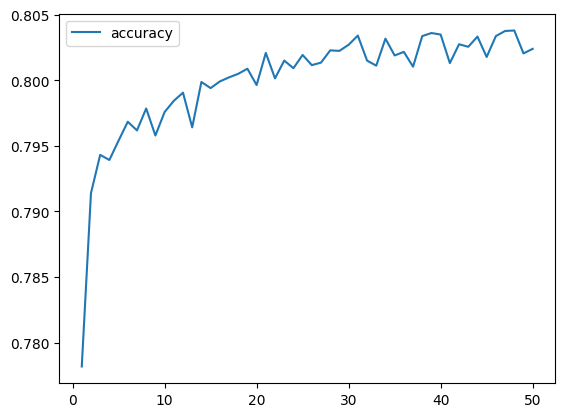

In [ ]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
# Export our model to HDF5 file
# nn_model.save("my_model.keras")
nn_model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# loaded_model = tf.keras.models.load_model('my_model.keras')
loaded_model = tf.keras.models.load_model('my_model.h5')

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               319200    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                                 
Total params: 800401 (3.05 MB)
Trainable params: 800401 (3.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
